In [4]:
import pandas as pd
from pandas import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [5]:
#!pip install seaborn

In [6]:
chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 250000 to 259999
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cid           10000 non-null  int64  
 1   cmpdname      10000 non-null  object 
 2   cmpdsynonym   10000 non-null  object 
 3   mw            10000 non-null  float64
 4   mf            10000 non-null  object 
 5   polararea     10000 non-null  float64
 6   complexity    10000 non-null  float64
 7   xlogp         9821 non-null   float64
 8   heavycnt      10000 non-null  int64  
 9   hbonddonor    10000 non-null  int64  
 10  hbondacc      10000 non-null  int64  
 11  rotbonds      10000 non-null  int64  
 12  inchi         10000 non-null  object 
 13  isosmiles     10000 non-null  object 
 14  inchikey      10000 non-null  object 
 15  iupacname     10000 non-null  object 
 16  meshheadings  0 non-null      float64
 17  annothits     3042 non-null   object 
 18  annothitcnt   10000 

In [7]:
# take around 2 hours to complete with boost mode.
#filename=r'D:\projects dataset\PubChem\PubChem_compound_list_puED-FQtMZEGv7mmO97wi9E_ml-dFG3wF9V2vAzEZL0M3Vg.csv'
#df_struct = pd.read_csv(r"D:\projects dataset\PubChem\PubChem_compound_list_puED-FQtMZEGv7mmO97wi9E_ml-dFG3wF9V2vAzEZL0M3Vg.csv",low_memory=False)
#df_struct = pd.read_csv(filename,low_memory=False)
#df_struct.head()
df_struct = pd.read_csv(r"D:\projects dataset\PubChem\PubChem_compound_list_puED-FQtMZEGv7mmO97wi9E_ml-dFG3wF9V2vAzEZL0M3Vg.csv",iterator=True, chunksize=1000)
#for chunk in pd.read_csv(df_struct, chunksize=chunksize):
    ## process chunk
    #print(chunk)
df_struct_all = concat(df_struct, ignore_index=True)
print(df_struct_all)

                cid                                           cmpdname  \
0                11                                 1,2-Dichloroethane   
1                15                          17-Hydroxyandrostan-3-one   
2                19                          2,3-Dihydroxybenzoic acid   
3                24  2-Amino-5,6,7,8-tetrahydroxy-6-(1,2,3-trihydro...   
4                52             (2S,3R)-3-Hydroxy-2-methylbutanoyl-CoA   
...             ...                                                ...   
11772249  164677130                                                NaN   
11772250  164678801                                                NaN   
11772251  164684105                                                NaN   
11772252  164684599                                                NaN   
11772253  164686992                                                NaN   

                                                cmpdsynonym      mw  \
0         1,2-dichloroethane|Ethylene di

In [8]:
#df_struct = chunk
df_struct_all.head()


,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,inchikey,iupacname,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
0,11,"1,2-Dichloroethane","1,2-dichloroethane|Ethylene dichloride|107-06-...",98.96,C2H4Cl2,0.0,6.0,1.5,4,0,...,WSLDOOZREJYCGB-UHFFFAOYSA-N,"1,2-dichloroethane",NaN,Agrochemical Information|Biological Test Resul...,15,421|426|427|433|434|435|445|530|540|541|542|54...,20040916,3B Scientific (Wuhan) Corp|A2B Chem|AA BLOCKS|...,Chemical Vendors|Curation Efforts|Governmental...,NaN
1,15,17-Hydroxyandrostan-3-one,17-Hydroxyandrostan-3-one|5.beta.-Dihydrotesto...,290.40,C19H30O2,37.3,459.0,3.7,21,1,...,NVKAWKQGWWIWPM-UHFFFAOYSA-N,"17-hydroxy-10,13-dimethyl-1,2,4,5,6,7,8,9,11,1...",Dihydrotestosterone,Biological Test Results|Classification|Literat...,6,1259397|1259398|1259423,20050325,ABI Chem|AKos Consulting & Solutions|Ambinter|...,Chemical Vendors|Curation Efforts|Governmental...,NaN
2,19,"2,3-Dihydroxybenzoic acid","2,3-Dihydroxybenzoic acid|303-38-8|Pyrocatechu...",154.12,C7H6O4,77.8,157.0,1.2,11,3,...,GLDQAMYCGOIJDV-UHFFFAOYSA-N,"2,3-dihydroxybenzoic acid",NaN,Biological Test Results|Biomolecular Interacti...,11,330|608|1033|1376|1385|1422|1465|1511|1529|153...,20040916,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,NaN
3,24,"2-Amino-5,6,7,8-tetrahydroxy-6-(1,2,3-trihydro...",NaN,323.26,C9H17N5O8,216.0,491.0,-4.5,22,9,...,SQDFRPSZAQYREW-UHFFFAOYSA-N,"2-amino-5,6,7,8-tetrahydroxy-6-(1,2,3-trihydro...",NaN,NaN,0,NaN,20050623,ABI Chem|ChemSpider|ChemTik|NextBio,Chemical Vendors|Legacy Depositors|Research an...,NaN
4,52,"(2S,3R)-3-Hydroxy-2-methylbutanoyl-CoA","CID52; (Acyl-CoA); [M+H]+;|(2S,3R)-3-Hydroxy-2...",867.70,C26H44N7O18P3S,409.0,1480.0,-5.4,55,10,...,PEKYNTFSOBAABV-UHFFFAOYSA-N,S-[2-[3-[[4-[[[5-(6-aminopurin-9-yl)-4-hydroxy...,NaN,NaN,0,NaN,20050623,ABI Chem|ChemDB|Cheminformatics Friedrich-Schi...,Chemical Vendors|Curation Efforts|Legacy Depos...,NaN


In [9]:
df_struct_all.tail()

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,inchikey,iupacname,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
11772249,164677130,NaN,NaN,301.19,C11H13F5NOP,12.2,377.0,3.5,19,0,...,MPFYTGFBBVDXID-UHFFFAOYSA-N,NaN,NaN,NaN,0,NaN,20220823,Thieme Chemistry,Journal Publishers|Subscription Services,NaN
11772250,164678801,NaN,NaN,327.22,C14H19BrN2O2,46.6,389.0,2.3,19,1,...,BKKKQFPXCXFUKU-SDQBBNPISA-N,(5Z)-5-[(4-bromo-1H-pyrrol-2-yl)methylidene]-2...,NaN,NaN,0,NaN,20220823,Thieme Chemistry,Journal Publishers|Subscription Services,NaN
11772251,164684105,NaN,NaN,394.50,C26H22N2O2,49.7,679.0,4.9,30,0,...,XCJZSHRZRXSTLB-FFFOYBKKSA-N,(4S)-4-benzyl-5-methyl-4-[(Z)-3-oxo-3-phenylpr...,NaN,NaN,0,NaN,20220823,Thieme Chemistry,Journal Publishers|Subscription Services,NaN
11772252,164684599,NaN,NaN,496.40,C25H27BrNOPSi,29.1,635.0,NaN,30,1,...,UUXLNQMKZNECJS-RUZDIDTESA-N,NaN,NaN,NaN,0,NaN,20220823,Thieme Chemistry,Journal Publishers|Subscription Services,NaN
11772253,164686992,NaN,NaN,420.50,C28H20O4,52.6,675.0,5.9,32,0,...,RJUKYPBUWAVDKP-UHFFFAOYSA-N,2-acetyl-4-(4-methoxyphenyl)-3-phenylxanthen-9...,NaN,NaN,0,NaN,20220823,Thieme Chemistry,Journal Publishers|Subscription Services,NaN


In [11]:
df_struct_all[df_struct_all.columns[0]].count()

11772254

In [12]:
len(df_struct_all.index)

11772254

In [ ]:
df_struct_all.isnull().sum()

In [ ]:
df_struct_all.info()

In [ ]:
df_struct_all[["mw","polararea","complexity","xlogp","heavycnt","hbonddonor","hbondacc","rotbonds","annothitcnt","cidcdate"]].isnull().sum()/len(df_struct_all["mw"])

In [13]:
# import tensorflow as tf
# gups = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:
#         #Currently, memory growth needs to be the same across GPUs
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e)
# print("TF will attempt to allocate only as much GPU memory as needed for the runtime allocation")

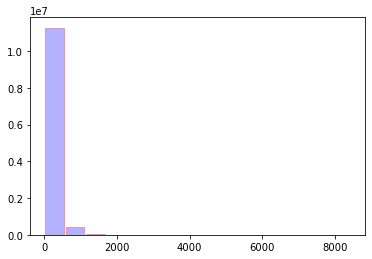

In [16]:
#plotting histogram 
plt.hist(df_struct_all['polararea'],rwidth=0.9,alpha=0.3,color='blue',bins=15,edgecolor='red') 

#x and y-axis labels 
#plt.xlabel('Base price range') 
#plt.ylabel('Distinct order') 

#plot title 
#plt.title('Inspecting price effect') 
plt.rcParams["figure.figsize"] = (8,8)
#save and display the plot 
#plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_10.png',dpi=300,bbox_inches='tight') 
plt.show();

In [17]:
df_struct_all.columns

Index(['cid', 'cmpdname', 'cmpdsynonym', 'mw', 'mf', 'polararea', 'complexity',
       'xlogp', 'heavycnt', 'hbonddonor', 'hbondacc', 'rotbonds', 'inchi',
       'isosmiles', 'inchikey', 'iupacname', 'meshheadings', 'annothits',
       'annothitcnt', 'aids', 'cidcdate', 'sidsrcname', 'depcatg',
       'annotation'],
      dtype='object')

In [18]:
df_struct_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11772254 entries, 0 to 11772253
Data columns (total 24 columns):
 #   Column        Dtype  
---  ------        -----  
 0   cid           int64  
 1   cmpdname      object 
 2   cmpdsynonym   object 
 3   mw            float64
 4   mf            object 
 5   polararea     float64
 6   complexity    float64
 7   xlogp         float64
 8   heavycnt      int64  
 9   hbonddonor    int64  
 10  hbondacc      int64  
 11  rotbonds      int64  
 12  inchi         object 
 13  isosmiles     object 
 14  inchikey      object 
 15  iupacname     object 
 16  meshheadings  object 
 17  annothits     object 
 18  annothitcnt   int64  
 19  aids          object 
 20  cidcdate      int64  
 21  sidsrcname    object 
 22  depcatg       object 
 23  annotation    object 
dtypes: float64(4), int64(7), object(13)
memory usage: 2.1+ GB


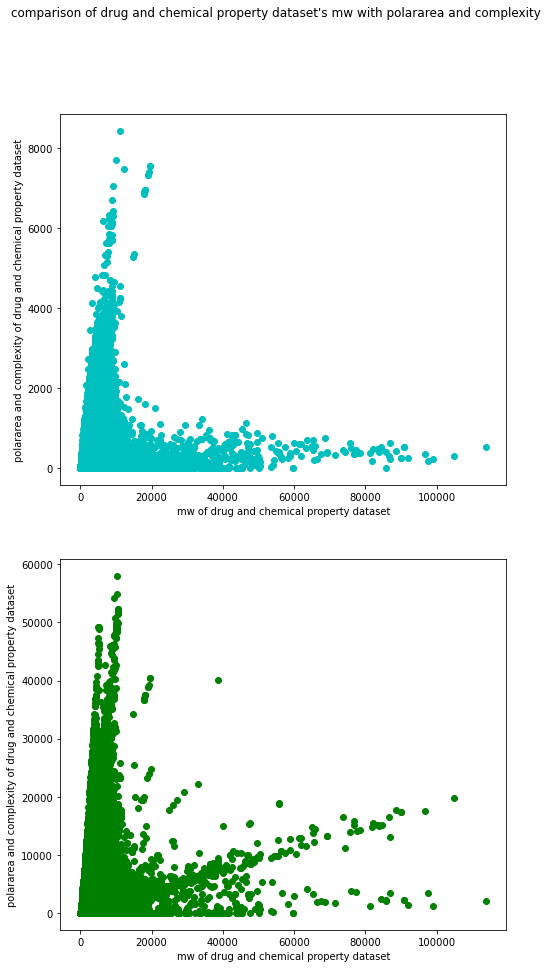

In [20]:
fig, axs = plt.subplots(2)
axs[0].scatter(df_struct_all['mw'],df_struct_all['polararea'],color='c')
axs[1].scatter(df_struct_all['mw'],df_struct_all['complexity'],color='g')
fig.suptitle("comparison of drug and chemical property dataset's mw with polararea and complexity")
#plt.xlabel("mw of drug and chemical property dataset")
#plt.ylabel("polararea of drug and chemical property dataset")
plt.rcParams["figure.figsize"] = (15,15)
for ax in axs.flat:
    ax.set(xlabel="mw of drug and chemical property dataset",ylabel="polararea and complexity of drug and chemical property dataset")
plt.show()

In [ ]:
df_struct__all_new = df_struct_all.drop(['cmpdname','cmpdsynonym','mf','inchi','isosmiles','inchikey','iupacname','meshheadings','annothits','aids','sidsrcname','depcatg','annotation'],axis=1)
df_struct_all_new.head()

In [ ]:
df_struct_all_new.tail()

In [ ]:
len(df_struct_all_new)